In [1]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")

%autoreload 2
from mikg.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

In [2]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [3]:
exprDF = pd.read_csv("../seq_data/expression_ctzone_mean_df.tsv", sep="\t")

In [4]:
exprDFs = {}

for group in exprDF.group.unique():
    exprDFs[group] = exprDF[exprDF.group == group].copy()

print([x for x in exprDFs])

['Adipocyte_BZ', 'Adipocyte_CTRL', 'Adipocyte_FZ', 'Adipocyte_IZ', 'Adipocyte_RZ', 'Cardiomyocyte_BZ', 'Cardiomyocyte_CTRL', 'Cardiomyocyte_FZ', 'Cardiomyocyte_IZ', 'Cardiomyocyte_RZ', 'Cycling cells_BZ', 'Cycling cells_CTRL', 'Cycling cells_FZ', 'Cycling cells_IZ', 'Cycling cells_RZ', 'Endothelial_BZ', 'Endothelial_CTRL', 'Endothelial_FZ', 'Endothelial_IZ', 'Endothelial_RZ', 'Fibroblast_BZ', 'Fibroblast_CTRL', 'Fibroblast_FZ', 'Fibroblast_IZ', 'Fibroblast_RZ', 'Lymphoid_BZ', 'Lymphoid_CTRL', 'Lymphoid_FZ', 'Lymphoid_IZ', 'Lymphoid_RZ', 'Mast_BZ', 'Mast_CTRL', 'Mast_FZ', 'Mast_IZ', 'Mast_RZ', 'Myeloid_BZ', 'Myeloid_CTRL', 'Myeloid_FZ', 'Myeloid_IZ', 'Myeloid_RZ', 'Neuronal_BZ', 'Neuronal_CTRL', 'Neuronal_FZ', 'Neuronal_IZ', 'Neuronal_RZ', 'Pericyte_BZ', 'Pericyte_CTRL', 'Pericyte_FZ', 'Pericyte_IZ', 'Pericyte_RZ', 'vSMCs_BZ', 'vSMCs_CTRL', 'vSMCs_FZ', 'vSMCs_IZ', 'vSMCs_RZ']


In [5]:
exprKGs = {}

for group in exprDFs:
    
    print(group)
    
    gKG = KGraph()
    
    gKG.load_kgraph("../data/initial_base_graph.out")

    gKG.add_gene_expression(exprDFs[group])

    mNS = MeanNetworkScorer()
    mNS.score(gKG)
        
    exprKGs[group] = gKG

Adipocyte_BZ
11776
Found Genes 9741


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Adipocyte_CTRL
11534
Found Genes 9517
Adipocyte_FZ
19844
Found Genes 14140
Adipocyte_IZ
13891
Found Genes 11261
Adipocyte_RZ
19899
Found Genes 14226
Cardiomyocyte_BZ
25788
Found Genes 16110
Cardiomyocyte_CTRL
26606
Found Genes 16313
Cardiomyocyte_FZ
24982
Found Genes 15881
Cardiomyocyte_IZ
21309
Found Genes 15212
Cardiomyocyte_RZ
27152
Found Genes 16443
Cycling cells_BZ
15949
Found Genes 12683
Cycling cells_CTRL
19220
Found Genes 14136
Cycling cells_FZ
18166
Found Genes 13876
Cycling cells_IZ
21130
Found Genes 15231
Cycling cells_RZ
18566
Found Genes 13841
Endothelial_BZ
23459
Found Genes 15535
Endothelial_CTRL
25312
Found Genes 16002
Endothelial_FZ
24541
Found Genes 15899
Endothelial_IZ
23010
Found Genes 15805
Endothelial_RZ
25695
Found Genes 16101
Fibroblast_BZ
24844
Found Genes 15891
Fibroblast_CTRL
26102
Found Genes 16185
Fibroblast_FZ
24978
Found Genes 15961
Fibroblast_IZ
22752
Found Genes 15752
Fibroblast_RZ
26333
Found Genes 16246
Lymphoid_BZ
19292
Found Genes 14206
Lymphoid_CTR

In [6]:
import pickle

print(len(exprKGs))

with open("zone_exprkgs.pickle", 'wb') as f:
    pickle.dump(exprKGs, f)

55


In [7]:
##
##
##
#  START HERE
##
##
##

In [8]:
exprKGs = pickle.load(open("zone_exprkgs.pickle", "rb"))

In [9]:
tissue2zone2kg = defaultdict(lambda : dict())
for x in exprKGs:
    tissue, zone = x.split("_")
    
    tissue2zone2kg[tissue]["{}_{}".format(tissue, zone)] = exprKGs[x]

In [10]:
for x in tissue2zone2kg:
    print(x, len(tissue2zone2kg[x]), [x for x in tissue2zone2kg[x]])

Adipocyte 5 ['Adipocyte_BZ', 'Adipocyte_CTRL', 'Adipocyte_FZ', 'Adipocyte_IZ', 'Adipocyte_RZ']
Cardiomyocyte 5 ['Cardiomyocyte_BZ', 'Cardiomyocyte_CTRL', 'Cardiomyocyte_FZ', 'Cardiomyocyte_IZ', 'Cardiomyocyte_RZ']
Cycling cells 5 ['Cycling cells_BZ', 'Cycling cells_CTRL', 'Cycling cells_FZ', 'Cycling cells_IZ', 'Cycling cells_RZ']
Endothelial 5 ['Endothelial_BZ', 'Endothelial_CTRL', 'Endothelial_FZ', 'Endothelial_IZ', 'Endothelial_RZ']
Fibroblast 5 ['Fibroblast_BZ', 'Fibroblast_CTRL', 'Fibroblast_FZ', 'Fibroblast_IZ', 'Fibroblast_RZ']
Lymphoid 5 ['Lymphoid_BZ', 'Lymphoid_CTRL', 'Lymphoid_FZ', 'Lymphoid_IZ', 'Lymphoid_RZ']
Mast 5 ['Mast_BZ', 'Mast_CTRL', 'Mast_FZ', 'Mast_IZ', 'Mast_RZ']
Myeloid 5 ['Myeloid_BZ', 'Myeloid_CTRL', 'Myeloid_FZ', 'Myeloid_IZ', 'Myeloid_RZ']
Neuronal 5 ['Neuronal_BZ', 'Neuronal_CTRL', 'Neuronal_FZ', 'Neuronal_IZ', 'Neuronal_RZ']
Pericyte 5 ['Pericyte_BZ', 'Pericyte_CTRL', 'Pericyte_FZ', 'Pericyte_IZ', 'Pericyte_RZ']
vSMCs 5 ['vSMCs_BZ', 'vSMCs_CTRL', 'vSMCs_FZ

In [11]:
gsa = GenesetAnnotator()
for t in tissue2zone2kg:
    for z in tissue2zone2kg[t]:

        print(t,z)
        gsa.annotate_genesets(tissue2zone2kg[t][z], settype="disease", targettype="gene") # how specific is gene for disease?
        gsa.annotate_genesets(tissue2zone2kg[t][z], settype="disease", targettype="drug") # how specific is drug for disease?

Adipocyte Adipocyte_BZ
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Adipocyte Adipocyte_CTRL
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Adipocyte Adipocyte_FZ
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Adipocyte Adipocyte_IZ
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Adipocyte Adipocyte_RZ
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Cardiomyocyte Cardiomyocyte_BZ
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Cardiomyocyte Cardiomyocyte_CTRL
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Cardiomyocyte Cardiomyocyte_FZ
CLDN14
Processed 7178 of 20937 target nodes
CHEMBL628
Processed 3211 of 3211 target nodes
Cardiomyocyte Cardiomyocyte_IZ
CLDN14
Processed 7178 of 20937 target

In [12]:
tissues = [x for x in tissue2zone2kg]
zones = [x for x in tissue2zone2kg[tissues[0]]]

print(tissues)
print(zones)

['Adipocyte', 'Cardiomyocyte', 'Cycling cells', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'vSMCs']
['Adipocyte_BZ', 'Adipocyte_CTRL', 'Adipocyte_FZ', 'Adipocyte_IZ', 'Adipocyte_RZ']


In [13]:
fKG = tissue2zone2kg[tissues[0]][zones[0]]

fKG.get_edge_between_type()

Counter({('gene', 'geneset'): 412907,
         ('gene', 'gene'): 362249,
         ('gene', 'disease'): 48403,
         ('geneset', 'geneset'): 74934,
         ('drug', 'disease'): 35825,
         ('drug', 'gene'): 8267,
         ('drug', 'geneset'): 36})

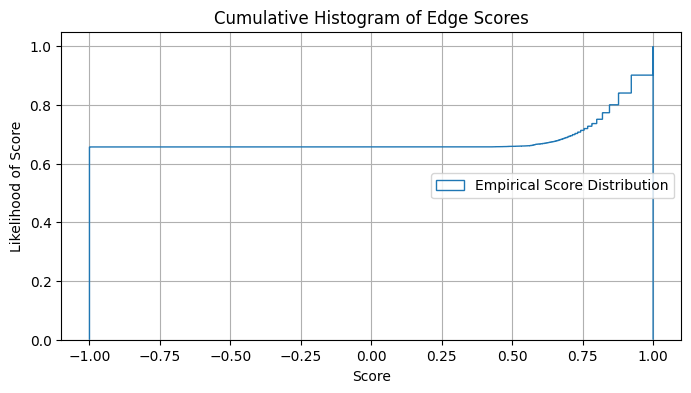

In [14]:
fKG = tissue2zone2kg[tissues[0]][zones[0]]

fKG.plot_node_attribute_histogram(lambda x: x.get("disease_spec", -1), node_type="gene")

In [15]:
fKG.kg.nodes["CHEMBL628"]

{'type': 'drug',
 'source': 'opentargets',
 'name': 'PENTOXIFYLLINE',
 'drug_type': 'Small molecule',
 'score': 0.4352621382293841,
 'disease_spec': 0.559086512134041}

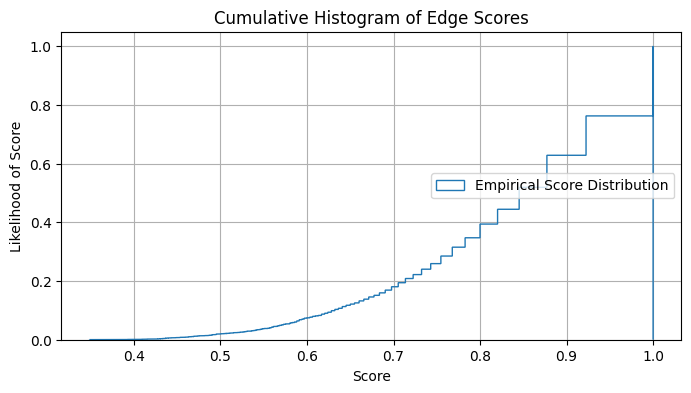

In [16]:
fKG = tissue2zone2kg[tissues[0]][zones[0]]

fKG.plot_node_attribute_histogram(lambda x: x.get("disease_spec", -1), node_type="drug")

In [23]:
basedir = "/usr/local/hdd3/mikg/MI_output"

for x in glob.glob("{}/*/*".format(basedir)):
    os.remove(x)

sigKGraphs = {}

for tissue in tissue2zone2kg:
    print(tissue)
    
    zoneSort = {
        "CTRL": 0,
        "RZ": 1,
        "BZ": 2,
        "FZ": 3,
        "IZ": 4
    }
    
    tissueKGs = tissue2zone2kg[tissue]
    
    sTZ = sorted([x for x in tissueKGs], key=lambda x: zoneSort.get(x.split("_")[1], -1))
    
    sTissueKGs = {x: tissueKGs[x] for x in sTZ}
    
    dmi = DifferentialModuleIdentifier()
    
    all_comms = {}
    for zone in sTissueKGs:
        print(tissue, zone)
        gene_kg = sTissueKGs[zone].to_gene_kgraph()
        
        zone_comms = gene_kg.get_communities(minEdgeScore = 1.0, resolution=4, prefix="{}_{}_mod".format(tissue, zone))
        sigcomm = dmi.identify_differential_communities(zone_comms, zone, sTissueKGs, verbose=False, min_enriched=0.9, minLogFC=-1)   
        
        for x in sigcomm:
            all_comms[x] = zone_comms[x]
        
    print(len(all_comms))

    for comm in all_comms:
        print(comm, len(all_comms[comm]))
        
                
        
        nwe = NetworkExtender()
        eKG = nwe.extend_network(all_comms[comm], sTissueKGs[zone], verbose=False, min_children_gs=3)
        nwe.extend_network_force(eKG, sTissueKGs[zone], "drug",
                                 acceptor=lambda n, k: k.kg.nodes[n].get("disease_spec", 1) >= 0.7, # only disease-specific drugs
                                 edge_acceptor=lambda e, k: not (k.kg.edges[e].get("evidence_status", "") in ["Withdrawn"]) # no withdrawn drugs
                                 )
        
        #eKG.plot_graph()
        
        outdir = os.path.join(basedir, tissue)
        os.makedirs(outdir, exist_ok=True)
        outdir = os.path.join(outdir, comm)
        dmi.plot_communities(sTissueKGs, [eKG.kg.nodes], zone, main_net=[all_comms[comm]], font_size=6, titles=[comm], num_columns=5, outfile=outdir)
        
        sigKGraphs[comm] = eKG
            

Adipocyte
Adipocyte Adipocyte_CTRL
DiGraph with 847 nodes and 2131 edges


/usr/local/hdd3/mikg/scripts/../mikg/kgraph.py:933: RuntimeWarning: divide by zero encountered in double_scalars
  diffScores[x]["ks"] = ks_2samp(commScores[x], ownScores)


Adipocyte Adipocyte_RZ
DiGraph with 959 nodes and 2786 edges
Adipocyte Adipocyte_BZ


In [ ]:
[x for x in sigKGraphs]

['Adipocyte_Adipocyte_CTRL_mod_11',
 'Adipocyte_Adipocyte_CTRL_mod_16',
 'Adipocyte_Adipocyte_CTRL_mod_19',
 'Adipocyte_Adipocyte_CTRL_mod_24',
 'Adipocyte_Adipocyte_RZ_mod_18',
 'Adipocyte_Adipocyte_FZ_mod_1',
 'Adipocyte_Adipocyte_FZ_mod_2',
 'Adipocyte_Adipocyte_FZ_mod_80',
 'Adipocyte_Adipocyte_FZ_mod_60',
 'Adipocyte_Adipocyte_FZ_mod_19',
 'Adipocyte_Adipocyte_FZ_mod_24',
 'Adipocyte_Adipocyte_FZ_mod_26',
 'Adipocyte_Adipocyte_FZ_mod_28',
 'Adipocyte_Adipocyte_FZ_mod_39',
 'Adipocyte_Adipocyte_FZ_mod_40',
 'Adipocyte_Adipocyte_FZ_mod_50',
 'Adipocyte_Adipocyte_FZ_mod_51',
 'Adipocyte_Adipocyte_FZ_mod_70',
 'Cardiomyocyte_Cardiomyocyte_FZ_mod_55',
 'Cardiomyocyte_Cardiomyocyte_IZ_mod_3',
 'Cardiomyocyte_Cardiomyocyte_IZ_mod_14',
 'Cycling cells_Cycling cells_FZ_mod_2',
 'Cycling cells_Cycling cells_IZ_mod_3',
 'Endothelial_Endothelial_IZ_mod_50',
 'Fibroblast_Fibroblast_IZ_mod_7',
 'Lymphoid_Lymphoid_FZ_mod_29',
 'Mast_Mast_FZ_mod_40',
 'Mast_Mast_IZ_mod_8',
 'Mast_Mast_IZ_mod_10',

In [ ]:
import pickle

with open("zone_sigkgs.pickle", 'wb') as f:
    
    for x in sigKGraphs:
        sigKGraphs[x].kg = sigKGraphs[x].kg.copy()
    
    pickle.dump(sigKGraphs, f)

In [ ]:
##
##
##
#  AND MAYBE HERE
##
##
##

In [ ]:
sigKGraphs = pickle.load(open("zone_sigkgs.pickle", "rb"))